In [1]:
# Libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dataset use from sklearn.dataset.make_regression

In [2]:
X, y = make_regression(
    n_samples = 10000,
    n_features = 1,
    n_targets = 1,
    random_state = 42
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = lr.predict(X_test)

In [6]:
# evaluate data
print(f'R^2 score: {r2_score(y_test, y_pred)}')
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))
print(f'Adjusted r^2: {adjusted_r2}')
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Root mean absolute error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score: 1.0
Adjusted r^2: 1.0
Mean absolute error: 5.682553386177069e-15
Mean squared error: 5.451486750338147e-29
Root mean absolute error: 7.383418415841098e-15


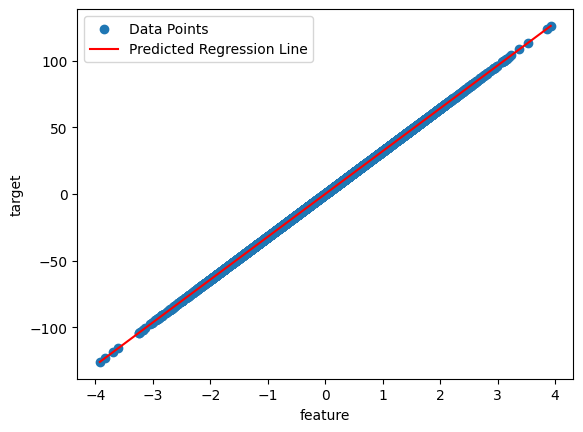

In [7]:
plt.scatter(X, y, label = "Data Points")
idx = np.argsort(X.flatten())
X_sorted = X.flatten()[idx]
y_pred_sorted = lr.predict(X_sorted.reshape(-1, 1))
plt.plot(X_sorted, y_pred_sorted, color = 'red', label = 'Predicted Regression Line')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.show()

# Use Salary Dataset

In [8]:
df = pd.read_csv('Salary_dataset.csv')

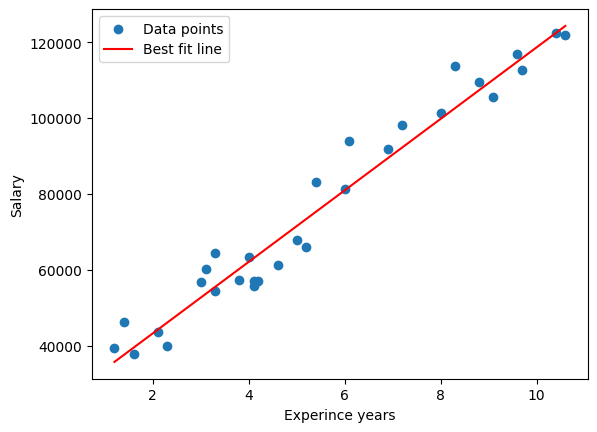

In [9]:
# features
X = df[['YearsExperience']]
y = df['Salary']

# Train & split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

# fit the model
lr.fit(X_train,y_train)

# Prediction
y_pred = lr.predict(X_test)

# Plot scatter 
plt.scatter(X, y, label = 'Data points')
X_sorted = X.sort_values(by='YearsExperience')
plt.plot(X_sorted, lr.predict(X_sorted), color ='red', label = 'Best fit line')
plt.xlabel('Experince years')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [10]:
# evaluate data
print(f'R^2 score: {r2_score(y_test, y_pred)}')
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))
print(f'Adjusted r^2: {adjusted_r2}')
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean square error: {mean_squared_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score: 0.9024461774180498
Adjusted r^2: 0.8780577217725622
Mean absolute error: 6286.453830757743
Mean square error: 49830096.855908364
Root mean squared error: 7059.043621901508


# Linear Regression using Pipeline

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [12]:
# Features
X = df[['YearsExperience']]
y = df['Salary']

# train & split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)
# Pipeline
pipeline = Pipeline([('standar_scaler',StandardScaler()), ('LinearRegression',LinearRegression())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standar_scaler', StandardScaler()),
                ('LinearRegression', LinearRegression())])

In [13]:
y_pred = pipeline.predict(X_test)

# evaluate data
print(f'R^2 score: {r2_score(y_test, y_pred)}')
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))
print(f'Adjusted r^2: {adjusted_r2}')
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean square error: {mean_squared_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score: 0.9024461774180499
Adjusted r^2: 0.8780577217725624
Mean absolute error: 6286.453830757742
Mean square error: 49830096.8559083
Root mean squared error: 7059.043621901504


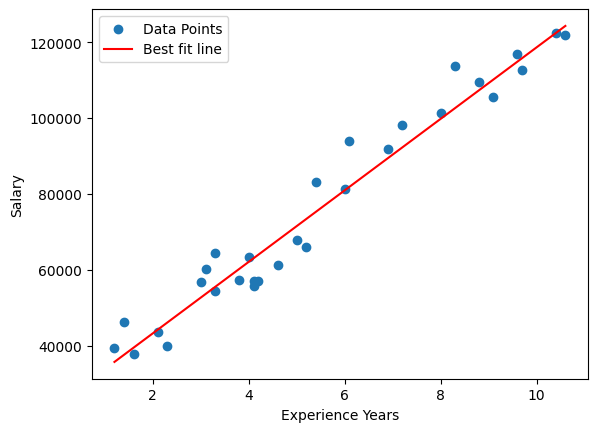

In [14]:
plt.scatter(X, y, label = 'Data Points')
X_sorted = X.sort_values(by = 'YearsExperience')
plt.plot(X_sorted, pipeline.predict(X_sorted), color = 'red', label = 'Best fit line')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend()
plt.show()